In [85]:
from quality_metrics import (
    angular_resolution,
    aspect_ratio,
    crossing_angle,
    crossing_number,
    gabriel_graph_property,
    ideal_edge_length,
    node_resolution,
    run_time,
    shape_based_metrics,
    stress,
)


d = "USpowerGrid"
l = "SS"


QUALITY_METRICS = {
    "angular_resolution": angular_resolution,
    "aspect_ratio": aspect_ratio,
    "crossing_angle": crossing_angle,
    "crossing_number": crossing_number,
    "gabriel_graph_property": gabriel_graph_property,
    "ideal_edge_length": ideal_edge_length,
    "node_resolution": node_resolution,
    "run_time": run_time,
    "shape_based_metrics": shape_based_metrics,
    "stress": stress,
}

ALL_QUALITY_METRICS_NAMES = sorted([name for name in QUALITY_METRICS])

import os

os.makedirs(f"images/cmp/{l}/{d}", exist_ok=True)

In [86]:
import pandas as pd


In [87]:
rpfs_df = pd.read_pickle(f"data/n_rpfs/{l}/{d}/20rp_50fs_1000.pkl")
opfs_df = pd.read_pickle(f"data/n_opfs/{l}/{d}/all.pkl")

In [88]:
rpfs_df

,pid,n_seed,params,pos,quality_metrics,n_params
0,0,0,"{'edge_length': 30, 'number_of_pivots_rate': 0...","{'3553': (1819.2227783203125, -179.85195922851...","{'angular_resolution': 9.301146051855613e-05, ...",0
1,0,1,"{'edge_length': 30, 'number_of_pivots_rate': 0...","{'3553': (-793.3121948242188, -1494.1302490234...","{'angular_resolution': 2.1003019421265088e-05,...",0
2,0,2,"{'edge_length': 30, 'number_of_pivots_rate': 0...","{'3553': (-1560.9119873046875, 854.87878417968...","{'angular_resolution': 8.608753595754915e-07, ...",0
3,0,3,"{'edge_length': 30, 'number_of_pivots_rate': 0...","{'3553': (-742.7498168945312, 1674.35668945312...","{'angular_resolution': 0.0001911658448327848, ...",0
4,0,4,"{'edge_length': 30, 'number_of_pivots_rate': 0...","{'3553': (548.8605346679688, 738.8475952148438...","{'angular_resolution': 9.43884578237147e-05, '...",0
...,...,...,...,...,...,...
995,19,45,"{'edge_length': 30, 'number_of_pivots_rate': 0...","{'3553': (517.6830444335938, 1529.546752929687...","{'angular_resolution': 1.818956697675358e-05, ...",19
996,19,46,"{'edge_length': 30, 'number_of_pivots_rate': 0...","{'3553': (-722.6197509765625, -900.330078125),...","{'angular_resolution': 6.206633856073076e-05, ...",19
997,19,47,"{'edge_length': 30, 'number_of_pivots_rate': 0...","{'3553': (-489.37481689453125, 2569.1994628906...","{'angular_resolution': 7.377353890233061e-05, ...",19
998,19,48,"{'edge_length': 30, 'number_of_pivots_rate': 0...","{'3553': (-553.4168701171875, 616.108581542968...","{'angular_resolution': 7.744045937534637e-05, ...",19


In [89]:
import matplotlib.pyplot as plt


In [90]:
q_opfs = {}

for name in ALL_QUALITY_METRICS_NAMES:
    q_opfs[name] = []


for name in ALL_QUALITY_METRICS_NAMES:
    tdf = opfs_df[opfs_df['target'] == name]
    for q in tdf['quality_metrics']:
        q_opfs[name].append(q[name])


In [91]:
q_rpfs = {}

for name in ALL_QUALITY_METRICS_NAMES:
    q_rpfs[name] = []

q_tmp = {}
for s, q in zip(rpfs_df["n_seed"], rpfs_df["quality_metrics"]):
    if s == 0:
        for name in ALL_QUALITY_METRICS_NAMES:
            q_tmp[name] = []
    for name in ALL_QUALITY_METRICS_NAMES:
        q_tmp[name].append(q[name])
    if s == 49:
        for name in ALL_QUALITY_METRICS_NAMES:
            q_rpfs[name].append(q_tmp[name])

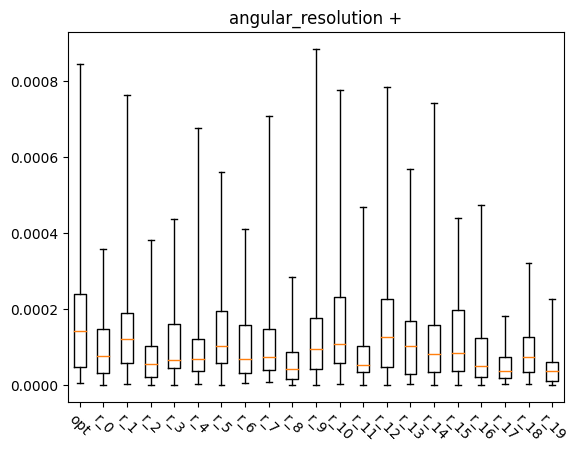

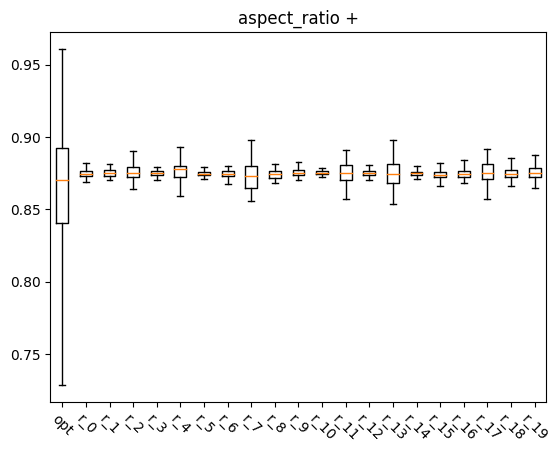

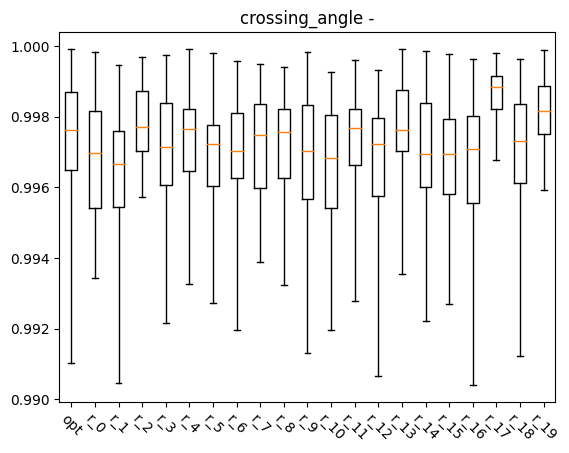

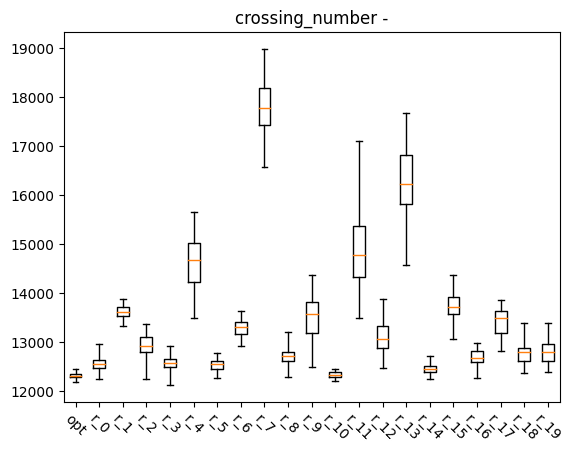

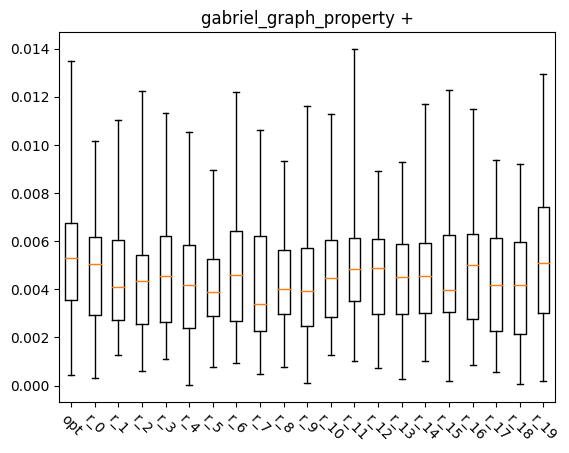

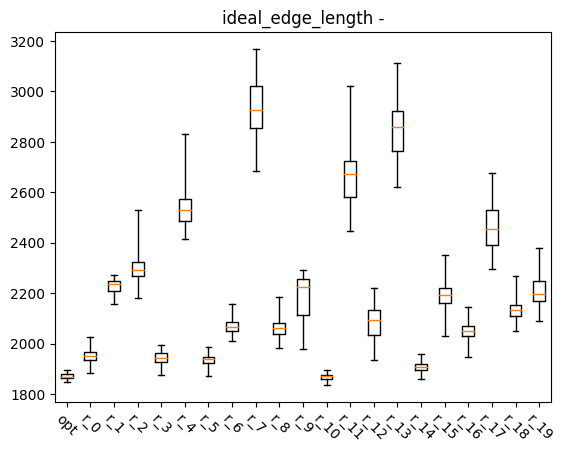

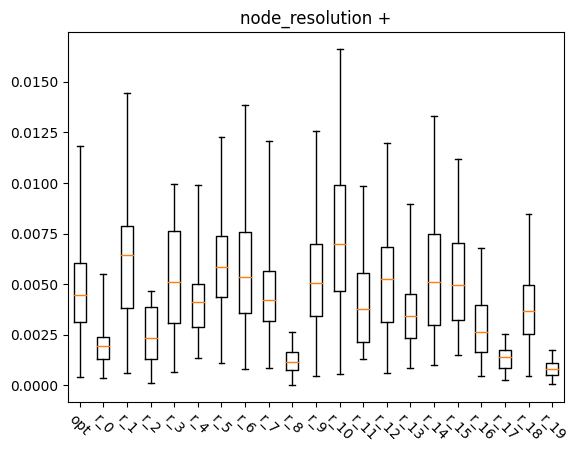

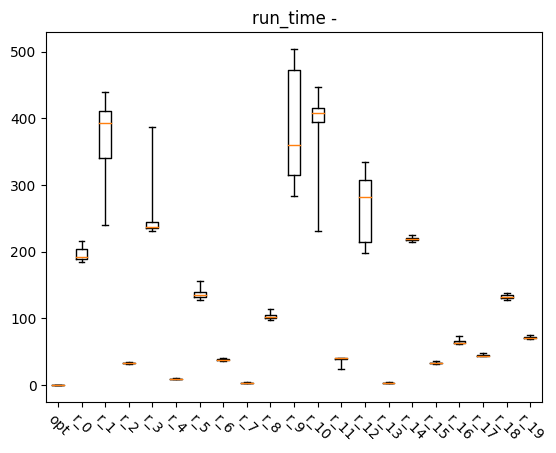

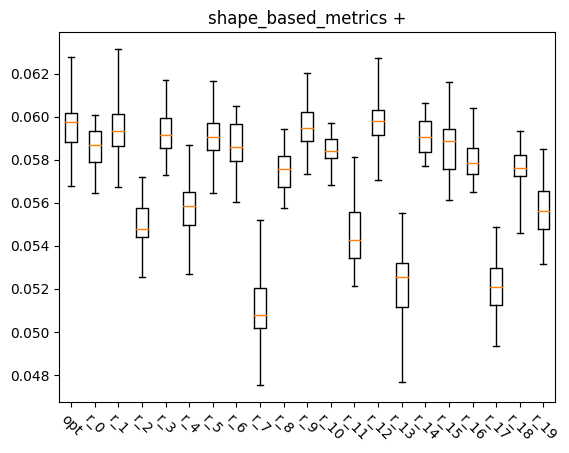

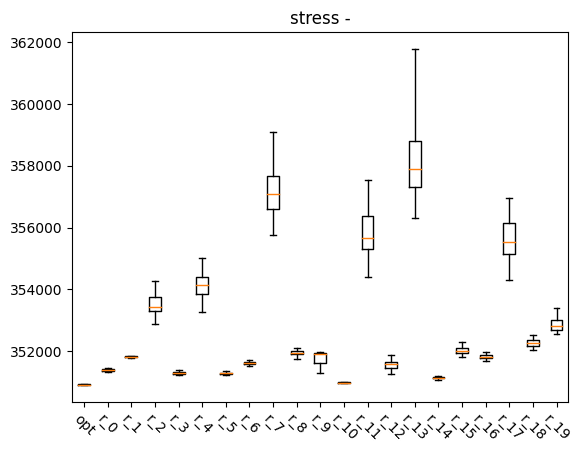

In [92]:
for name in ALL_QUALITY_METRICS_NAMES:
    bins = [q_opfs[name], *q_rpfs[name]]
    direction = QUALITY_METRICS[name].direction
    plt.title(f'{name} {"+" if direction == "maximize" else "-"}')
    plt.boxplot(
        bins,
        labels=[f"opt"] + [f"r_{n}" for n in range(len(q_rpfs[name]))],
        whis=float("inf"),
    )
    plt.xticks(rotation=-45, ha="center")
    plt.savefig(
        f"images/cmp/{l}/{d}/{name}.png",
        format="png",
        dpi=300,
        facecolor="white",
    )
    plt.show()
